In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get the training data

In [4]:
dfx = pd.read_csv(r"C:\Users\Bhabesh Boro\Desktop\AI mafia\Linear Regression\Linear_X_Train.csv")
dfy = pd.read_csv(r"C:\Users\Bhabesh Boro\Desktop\AI mafia\Linear Regression\Linear_Y_Train.csv")

x = dfx.values
y = dfy.values

x =x.reshape((-1,))
y =y.reshape((-1,))

print (x.shape)
print (y.shape)
print(x)
print(y)

(3750,)
(3750,)
[-0.28930742 -0.58880963  1.02750749 ... -0.30516366  1.67583291
 -0.49175724]
[-9.11011171e-02 -5.34677208e+01  7.54570088e+01 ... -3.49832749e+01
  1.45206092e+02 -1.71244939e+01]


# Visualise and preprocess

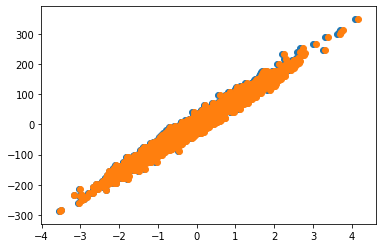

In [5]:
#normalization
plt.scatter(x,y)
X = (x-x.mean())/x.std()
Y = y
plt.scatter(X,Y)
plt.show()

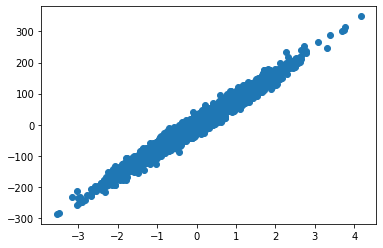

In [6]:
plt.scatter(X,Y)
plt.show()

# Gradient descent algorithm
    -Start with a random theta
    -Repeat until converge
        Update Theta according to the rule

In [11]:


#Hypothesis: h(x)=m*x+c=theta[1]*x+theta[0]
def hypothesis(x,theta):
    return theta[0] + theta[1]*x

#Size of array
def error(X,Y,theta):
    
    m=X.shape[0]                       
    error=0
    
    for i in range(m):
        hx=hypothesis(X[i],theta)      
        error += (hx-Y[i])**2         
        
    return error                      

#calculating gradient/slope:
def gradient(X,Y,theta):
    grad=np.zeros((2,))                
    m=X.shape[0]                       
    
    for i in range(m):
        hx=hypothesis(X[i],theta)      
        grad[0] +=  (hx-Y[i])
        grad[1] += (hx-Y[i])*X[i]
        
    return grad
    
#implementing the gradient descent algorithm to calculate the optimised value for theta(m,c) such that the error is minimized
def gradientDescent(X,Y,learning_rate=0.0005):        
    
    theta = np.array([-2.0,0.0]) 
    
    itr = 0
    max_itr = 100               
    
    error_list = []
    theta_list = []
    
    while(itr<=max_itr):         
        grad = gradient(X,Y,theta) 
        e = error(X,Y,theta)
        error_list.append(e)    
        
        theta_list.append((theta[0],theta[1]))  
        theta[0] = theta[0] - learning_rate*grad[0] 
        theta[1] = theta[1] - learning_rate*grad[1] 
        
        
        itr += 1
        
    
    return theta,error_list,theta_list

In [12]:
final_theta, error_list,theta_list = gradientDescent(X,Y)

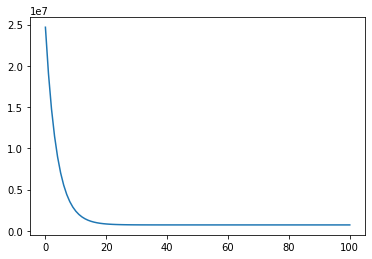

In [13]:
plt.plot(error_list)
plt.show()

In [14]:
print(final_theta)

[ 0.6838727  79.90584796]


In [15]:
### Plot the line for testing data

xtest = pd.read_csv(r"C:\Users\Bhabesh Boro\Desktop\AI mafia\Linear Regression\Linear_X_Test.csv")
x = xtest.values

x =x.reshape((-1,))
print (x.shape)

print(x)


(1250,)
[-1.87794441 -0.86903192 -2.53018242 ...  0.12800782 -0.27803759
 -0.68042543]


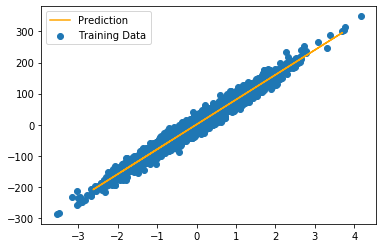

In [16]:
plt.scatter(X,Y,label='Training Data')
plt.plot(xtest,hypothesis(xtest,final_theta),color='orange',label="Prediction")
plt.legend()
plt.show()

In [18]:
print(hypothesis(xtest,final_theta))

               x
0    -149.374868
1     -68.756859
2    -201.492499
3     221.240429
4      47.908239
...          ...
1245  -12.744983
1246   75.173906
1247   10.912446
1248  -21.532957
1249  -53.686098

[1250 rows x 1 columns]
